In [1]:
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from astropy.io import fits

In [2]:
home = '/home/aurelien/DAWN/DJA-SEpp'
field = 'ceers-full-grizli-v7.2'

cpu_tiles = glob.glob(f"{home}/fields/{field}/cpu/*.csv")

data = {}

In [3]:
# CPU utilization, N_sources, rolling mean, color
cmap = matplotlib.colormaps.get_cmap('cool')
for tile in cpu_tiles:
    tile_id = int(re.search("Tile-(\d+)", tile).group(1))
    color = cmap(tile_id/26)
    cat = glob.glob(f"{home}/fields/{field}/sepp/*sci_tile-{tile_id}_sepp_cat.fits")[0]
    if "Sersic" in tile: tile_id = str(tile_id)+'s'
    data[tile_id] = {}
    data[tile_id]['color'] = color
    with fits.open(cat, memmap=True) as hdul:
        data[tile_id]['n_sources'] = len(hdul[1].data)
    df = pd.read_csv(tile)
    data[tile_id]['hours'] = df['Hours']
    data[tile_id]['CPU'] = df['CPU']
    df = df.rolling(21, min_periods=1).mean()
    data[tile_id]['CPU_avg'] = df['CPU']

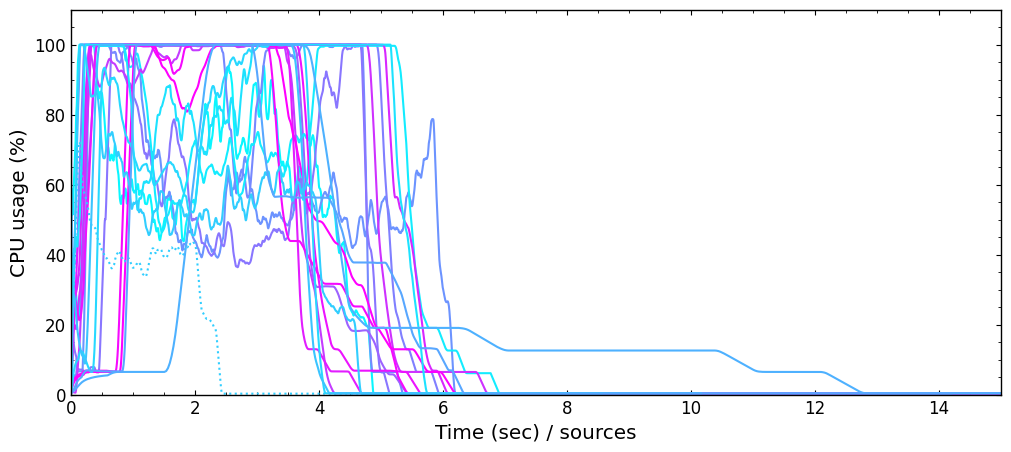

In [4]:
fig, ax = plt.subplots(figsize=(12,5))
for i in data:
    ls = ':' if 's' in str(i) else '-'
    ax.plot(3600*data[i]['hours']/data[i]['n_sources'], 100*data[i]['CPU_avg'], ls=ls, c=data[i]['color'])
ax.set_xlim(0,15)
ax.set_ylim(0,110)
ax.set_xlabel("Time (sec) / sources")
ax.set_ylabel("CPU usage (%)")
plt.show()